In [1]:
from IPython.core.display import display, HTML
import os

if os.getenv('TITLE') is not None:
    display(HTML('<h1>'+os.getenv('TITLE')+'</h1>'))

/tmp/ipykernel_219720/949785084.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
# Load all of the modules
import sys, os

CWD             = os.getcwd()
basepath        = os.path.dirname(CWD)
OS_AMRWINDFEDIR = os.getenv('AMRWINDFEDIR')

# amrwindfedirs = ['../../amr-wind-frontend',
#                  basepath]
# if OS_AMRWINDFEDIR is not None: amrwindedirs.append(OS_AMRWINDFEDIR)
# for x in amrwindfedirs: sys.path.insert(1, x)

import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
from matplotlib.patches import Circle
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.ticker as ticker
from scipy.interpolate import RegularGridInterpolator
import math
import copy
from scipy.optimize import curve_fit
import re

In [3]:
# Load ruamel or pyyaml as needed                                                                                                                                                      
try:
    import ruamel.yaml
    yaml = ruamel.yaml.YAML(typ='rt')
    useruamel=True
    loaderkwargs = {}
    dumperkwargs = {}

    Loader=yaml.load
except:
    import yaml as yaml
    print("# Loaded yaml")
    useruamel=False
    loaderkwargs = {}
    dumperkwargs = {'default_flow_style':False }
    Loader=yaml.safe_load

In [4]:
OS_WORKDIR = os.getenv('WORKDIR')
if OS_WORKDIR is not None:
    os.chdir(OS_WORKDIR)

In [5]:
def get_relative_value(y,avg_length_start,avg_length_end):
    y_initial = np.nanmean(y[:avg_length_start])
    y_to_plot = np.nanmean(y[-avg_length_end:])
    y_relative = (y-y_initial)/(y_to_plot-y_initial)
    return y_relative,y_to_plot,y_initial

In [6]:
def simple_rolling_average(data, window_size):
    """
    Calculates the simple rolling average of a 1D NumPy array.

    Args:
        data (np.ndarray): The input 1D NumPy array.
        window_size (int): The size of the moving window.

    Returns:
        np.ndarray: A new array containing the simple rolling averages.
    """
    if not isinstance(data, np.ndarray) or data.ndim != 1:
        raise ValueError(f"Input 'data' must be a 1D NumPy array not array of shape {str(np.shape(data))}")
    if not isinstance(window_size, int) or window_size <= 0:
        raise ValueError("Input 'window_size' must be a positive integer.")
    if window_size > len(data):
        raise ValueError("Window size cannot be larger than the data length.")

    # Create a kernel of ones for the average calculation
    weights = np.ones(window_size) / window_size

    # Convolve the data with the weights to get the rolling average
    rolling_avg = np.convolve(data, weights, mode='same')

    # Handle the edges by padding with NaN or another value
    pad_size = window_size // 2
    rolling_avg[:pad_size] = np.nan  # or use 0 or any other value
    rolling_avg[-pad_size:] = np.nan  # or use 0 or any other value

    return rolling_avg

In [7]:
# save parameters
savename_base = 'combination_combined_final'

In [8]:
# plotting
fontsize=28
colors = [(0.25,0.25,0.25),(0.75,0.75,0.75),(167/256, 199/256, 231/256),(171/256,55/256,46/256),(208/256,136/256,33/256),(0.2, 0.5, 0.8)]
pairlabel = os.getenv('PAIRLABEL')
if pairlabel==None:
    pairlabel = [] # $n_{env}=1$

In [9]:
caselist = []      

directory = 'windfarm_v0p12p20_FASTFarm/'
directory_1seed = 'windfarm_v0p12p20_1seed_FASTFarm/'

# 3 turbine

caselist.append({'label': 'ST agent',#, Yaw config. 0',#, 3-turbine',
                 'numturbines': 3,
                'trialname_specifier': '',
                'datafile':'combined_trial_3_10env'+''+'_data.pkl',
                'rundir':directory+'analysis/Group1/figures/',
                'color':colors[3],
                'linestyle':'--',
                'marker':'o'})    

caselist.append({'label': 'ST agent',#, Yaw Configs. 1-3',#, 3-turbine',
                 'numturbines': 3,
                'trialname_specifier': '',
                'datafile':'combined_trial_3_10env'+''+'_data.pkl',
                'rundir':directory+'analysis/Group2/figures/',
                'color':colors[3],
                'linestyle':'--',
                'marker':'o'})    

caselist.append({'label': 'PIF agent',#, Yaw config. 0',#, 3-turbine',
                 'numturbines': 3,
                'trialname_specifier': '',
                'datafile':'combined_trial_4_10env'+''+'_data.pkl',
                'rundir':directory+'analysis/Group1/figures/',
                'color':colors[4],
                'linestyle':'--',
                'marker':'o'})    

caselist.append({'label': 'PIF agent',#, Yaw Configs. 1-3',#, 3-turbine',
                 'numturbines': 3,
                'trialname_specifier': '',
                'datafile':'combined_trial_4_10env'+''+'_data.pkl',
                'rundir':directory+'analysis/Group2/figures/',
                'color':colors[4],
                'linestyle':'--',
                'marker':'o'}) 


caselist.append({'label': 'PIF+WS agent',#, Yaw config. 0',#, 3-turbine',
                 'numturbines': 3,
                'trialname_specifier': '',
                'datafile':'combined_trial_5_10env'+''+'_data.pkl',
                'rundir':directory+'analysis/Group1/figures/',
                'color':colors[5],
                'linestyle':'--',
                'marker':'o'})    

caselist.append({'label': 'PIF+WS agent',#, Yaw Configs. 1-3',#, 3-turbine',
                 'numturbines': 3,
                'trialname_specifier': '',
                'datafile':'combined_trial_5_10env'+''+'_data.pkl',
                'rundir':directory+'analysis/Group2/figures/',
                'color':colors[5],
                'linestyle':'--',
                'marker':'o'})


# 8 turbine

caselist.append({'label': 'ST agent',#, Yaw config. 0',#, 8-turbine',
                 'numturbines': 8,
                'trialname_specifier': '_medium',
                'datafile':'combined_trial_3_10env'+'_medium'+'_data.pkl',
                'rundir':directory+'analysis/Group1/figures/',
                'color':colors[3],
                'linestyle':'--',
                'marker':'o'})  

caselist.append({'label': ' ST agent',#, Yaw Configs. 1-3',#, 8-turbine',
                 'numturbines': 8,
                'trialname_specifier': '_medium',
                'datafile':'combined_trial_3_10env'+'_medium'+'_data.pkl',
                'rundir':directory+'analysis/Group2/figures/',
                'color':colors[3],
                'linestyle':'--',
                'marker':'o'})    

caselist.append({'label': 'PIF agent',#, Yaw config. 0',#, 8-turbine',
                 'numturbines': 8,
                'trialname_specifier': '_medium',
                'datafile':'combined_trial_4_10env'+'_medium'+'_data.pkl',
                'rundir':directory+'analysis/Group1/figures/',
                'color':colors[4],
                'linestyle':'--',
                'marker':'o'})  

caselist.append({'label': ' PIF agent',#, Yaw Configs. 1-3',#, 8-turbine',
                 'numturbines': 8,
                'trialname_specifier': '_medium',
                'datafile':'combined_trial_4_10env'+'_medium'+'_data.pkl',
                'rundir':directory+'analysis/Group2/figures/',
                'color':colors[4],
                'linestyle':'--',
                'marker':'o'})    

caselist.append({'label': 'PIF+WS agent',#, Yaw config. 0',#, 8-turbine',
                 'numturbines': 8,
                'trialname_specifier': '_medium',
                'datafile':'combined_trial_5_10env'+'_medium'+'_data.pkl',
                'rundir':directory+'analysis/Group1/figures/',
                'color':colors[5],
                'linestyle':'--',
                'marker':'o'})  

caselist.append({'label': ' PIF+WS agent',#, Yaw Configs. 1-3',#, 8-turbine',
                 'numturbines': 8,
                'trialname_specifier': '_medium',
                'datafile':'combined_trial_5_10env'+'_medium'+'_data.pkl',
                'rundir':directory+'analysis/Group2/figures/',
                'color':colors[5],
                'linestyle':'--',
                'marker':'o'})    

In [10]:
# plotting setup
plt.rc('font', size=fontsize)

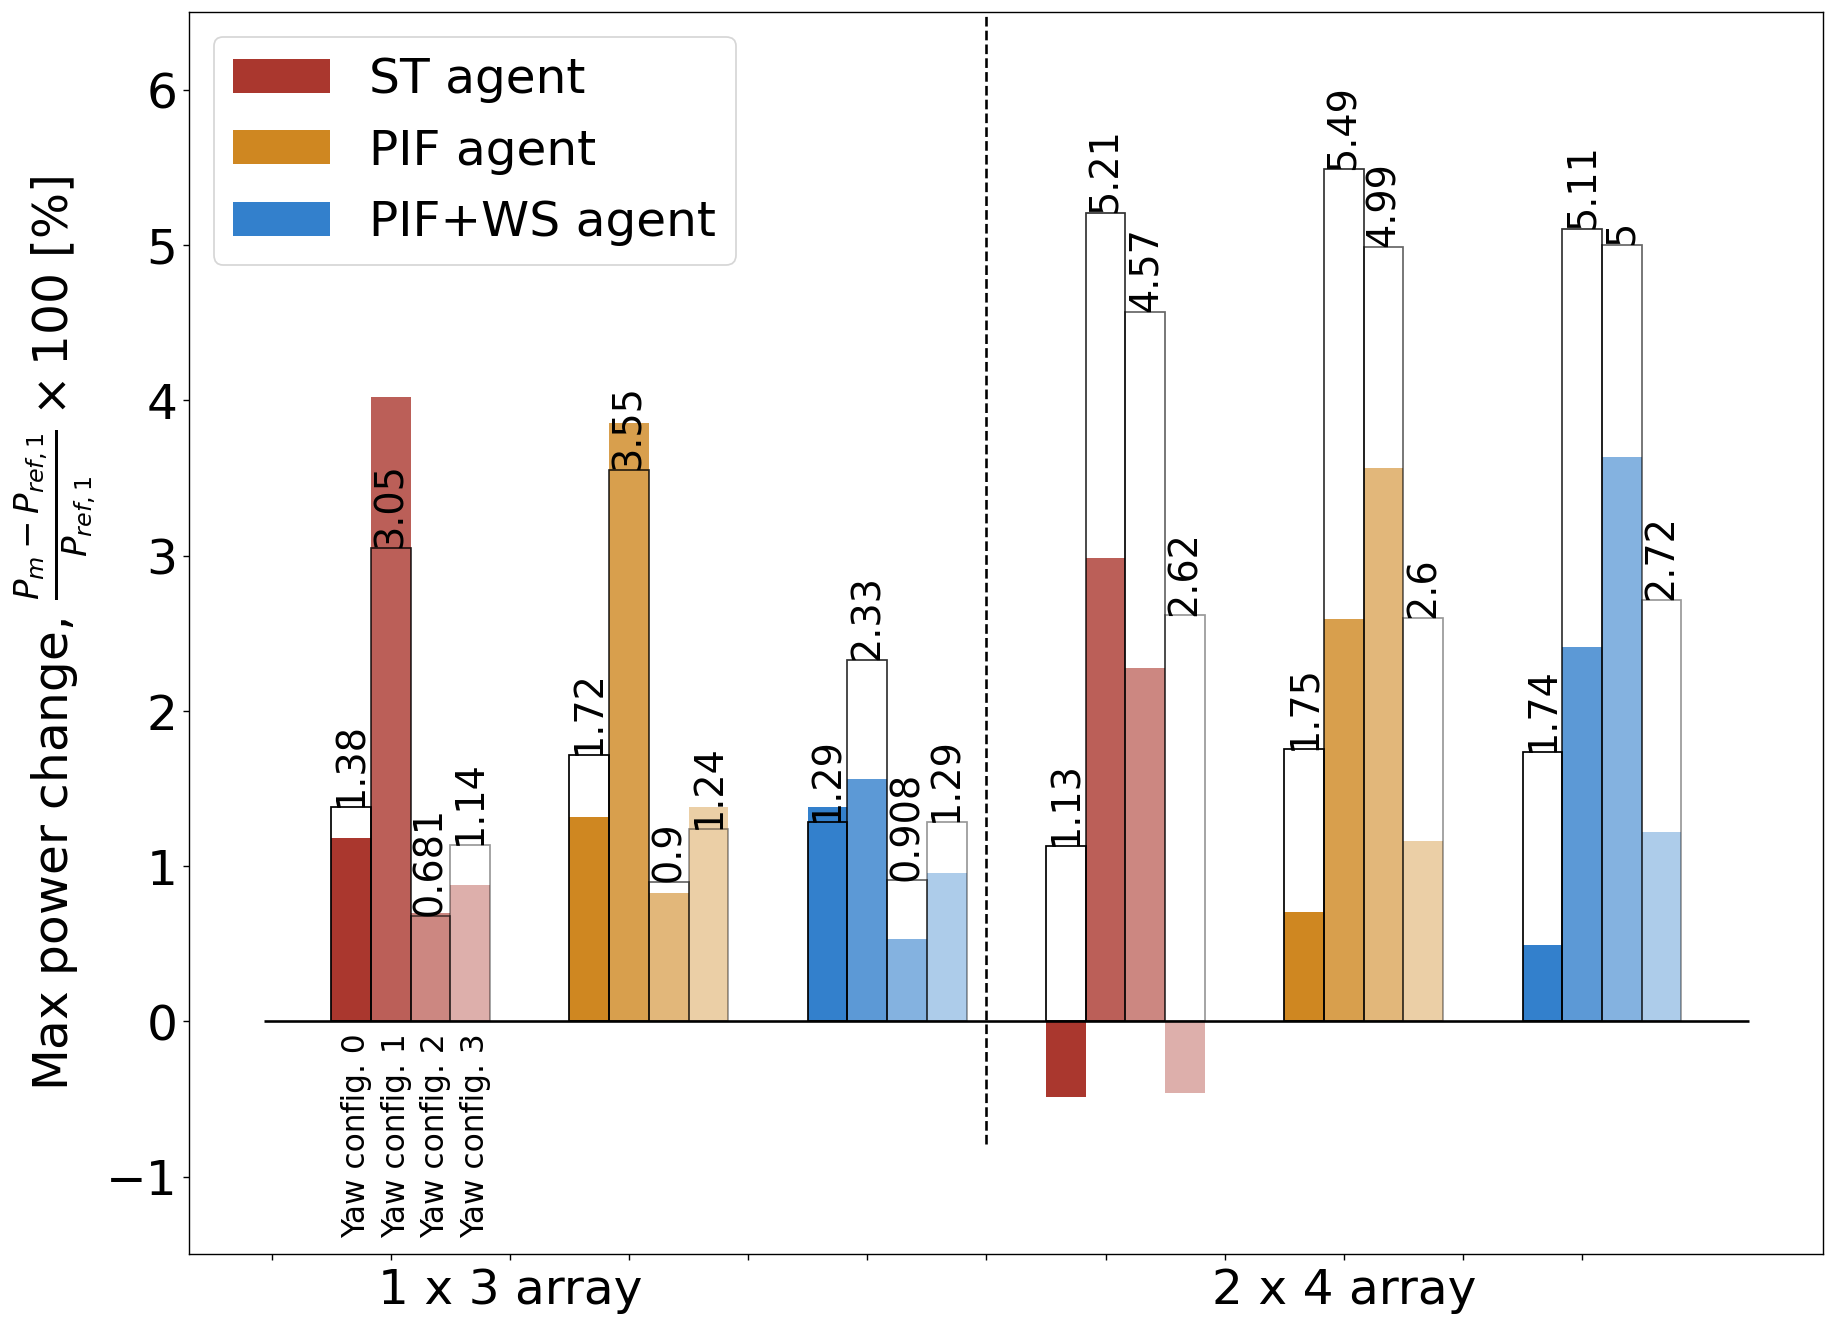

In [11]:
# plot rewards
fig, ax=plt.subplots(figsize=(10,6),dpi=125)
num_categories = len(caselist)
bar_width = 0.2
bar_major_spacing = bar_width*3

## plot realistic P_ref cases
bar_position_current = 0
for casei,case in enumerate(caselist):

    # load data
    with open(case['rundir']+case['datafile'], 'rb') as file:
        caselist_seeds = pickle.load(file)
           
    # loop over groups of three seeds
    more_seeds = True
    seed_index = 0
    seed_step = 3
    y_to_plot_accumulate = []
    while more_seeds:
        keepEvery = 1 # TODO: load this from pickle
        window_filtered = 100 # window for running mean of "filtered" version # TODO: load this from pickle
        # avg_length_start = 100 # num of episodes to average start of run to get initial value # TODO: load this from pickle
        # avg_length_end = 300 # num of episodes to average end of run to get final value # TODO: load this from pickle

        if len(caselist_seeds)>=seed_index+seed_step:
            mean_time = np.mean([case['data']['t'][::keepEvery] for case in caselist_seeds[seed_index:seed_index+seed_step]],axis=0)
            mean_values = np.mean([case['data']['r_stochastic_movingavg'][::keepEvery] for case in caselist_seeds[seed_index:seed_index+seed_step]],axis=0)
            mean_values_filtered = simple_rolling_average(mean_values,window_filtered)
            # _,y_to_plot,_ = get_relative_value(mean_values_filtered,avg_length_start,avg_length_end)
            y_to_plot = np.nanmax(mean_values_filtered)
            y_to_plot_accumulate.append(y_to_plot)
            seed_index += seed_step
        else:
            more_seeds = False

    # Plot the bars
    r = [None] * len(y_to_plot_accumulate)
    for i in range(len(y_to_plot_accumulate)):
        r[i] = bar_position_current + bar_width*i
        if len(y_to_plot_accumulate)!=1:
            index = i + 1
            alpha = 1-index*0.2
            bars = ax.bar(r[i], y_to_plot_accumulate[i], color=case['color'], alpha=alpha, width=bar_width)
            if casei<2:
                # ax.text(r[i]-bar_width/4,0.05,'Yaw config. '+str(i+1),rotation=90,fontsize=18)
                ax.text(r[i]-bar_width/4,-1.35,'Yaw config. '+str(i+1),rotation=90,fontsize=18)
        else:
            index = i
            alpha = 1-index*0.2
            if casei<len(caselist)/2:
                bars = ax.bar(r[i]+bar_width*2, y_to_plot_accumulate[i], color=case['color'], alpha=alpha, width=bar_width, label=case['label'])
            else:
                bars = ax.bar(r[i]+bar_width*2, y_to_plot_accumulate[i], color=case['color'], alpha=alpha, width=bar_width)
            if casei<2:
                # ax.text(r[i]+bar_width*2-bar_width/4,0.05,'Yaw config. '+str(i),rotation=90,fontsize=18)
                ax.text(r[i]+bar_width*2-bar_width/4,-1.35,'Yaw config. '+str(i),rotation=90,fontsize=18)
        # ax.bar_label(bars,fmt="{:.3g}",padding=0,fontsize=22,rotation=90)
    bar_position_current += bar_major_spacing

## plot idealized P_ref cases
bar_position_current = 0
for casei,case in enumerate(caselist):

    # load data
    rundir_new = case['rundir'].replace(directory,directory_1seed)
    with open(rundir_new+case['datafile'], 'rb') as file:
        caselist_seeds = pickle.load(file)
           
    # loop over groups of three seeds
    more_seeds = True
    seed_index = 0
    seed_step = 3
    y_to_plot_accumulate = []
    while more_seeds:
        keepEvery = 1 # TODO: load this from pickle
        window_filtered = 100 # window for running mean of "filtered" version # TODO: load this from pickle
        # avg_length_start = 100 # num of episodes to average start of run to get initial value # TODO: load this from pickle
        # avg_length_end = 300 # num of episodes to average end of run to get final value # TODO: load this from pickle

        if len(caselist_seeds)>=seed_index+seed_step:
            mean_time = np.mean([case['data']['t'][::keepEvery] for case in caselist_seeds[seed_index:seed_index+seed_step]],axis=0)
            mean_values = np.mean([case['data']['r_stochastic_movingavg'][::keepEvery] for case in caselist_seeds[seed_index:seed_index+seed_step]],axis=0)
            mean_values_filtered = simple_rolling_average(mean_values,window_filtered)
            # _,y_to_plot,_ = get_relative_value(mean_values_filtered,avg_length_start,avg_length_end)
            y_to_plot = np.nanmax(mean_values_filtered)
            y_to_plot_accumulate.append(y_to_plot)
            seed_index += seed_step
        else:
            more_seeds = False

    # Plot the bars
    r = [None] * len(y_to_plot_accumulate)
    for i in range(len(y_to_plot_accumulate)):
        r[i] = bar_position_current + bar_width*i
        if len(y_to_plot_accumulate)!=1:
            index = i + 1
            alpha = 1-index*0.2
            bars = ax.bar(r[i], y_to_plot_accumulate[i], facecolor='none', edgecolor='k', linewidth=1,  alpha=alpha, width=bar_width)
            # if casei<2:
                # ax.text(r[i]-bar_width/4,0.05,'Yaw config. '+str(i+1),rotation=90,fontsize=18)
        else:
            index = i
            alpha = 1-index*0.2
            if casei<len(caselist)/2:
                bars = ax.bar(r[i]+bar_width*2, y_to_plot_accumulate[i], facecolor='none', edgecolor='k', linewidth=1, alpha=alpha, width=bar_width) #, label=case['label'])
            else:
                bars = ax.bar(r[i]+bar_width*2, y_to_plot_accumulate[i], facecolor='none', edgecolor='k', linewidth=1, alpha=alpha, width=bar_width)
            # if casei<2:
            #     ax.text(r[i]+bar_width*2-bar_width/4,0.05,'Yaw config. '+str(i),rotation=90,fontsize=18)
        ax.bar_label(bars,fmt="{:.3g}",padding=0,fontsize=22,rotation=90)
    bar_position_current += bar_major_spacing

# Add grid lines
ax.vlines(x=bar_major_spacing*len(caselist)/2,ymin=ax.get_ylim()[0],ymax=ax.get_ylim()[1]+1,linestyle='--', color = 'k')
ax.hlines(y=0,xmin=ax.get_xlim()[0],xmax=ax.get_xlim()[1],linestyle='-', color = 'k')

# Add labels and title
# plt.ylabel(r'Final power change, $\frac{P_f-P_{ref}}{P_{ref}} \times 100$ [$\%$]')
plt.ylabel(r'Max power change, $\frac{P_m-P_{ref,1}}{P_{ref,1}} \times 100$ [$\%$]')
# ax.set_xlabel('Categories', fontweight='bold')
# ax.set_xticks([r*bar_major_spacing for r in range(num_categories)])
# ax.set_xticklabels([case['label'] for case in caselist], rotation=45)  # Rotate labels
ax.set_xticks([bar_major_spacing*x for x in np.arange(len(caselist))])
ax.set_xticklabels(['','','1 x 3 array','','','','','','','2 x 4 array','',''])  # Rotate labels
ax.set_ylim([-1.5,6.5])
# ax.set_title('Grouped Bar Plot Example')
ax.legend(loc='upper left')
plt.subplots_adjust(bottom=0.35)  # Increase bottom margin
plt.gcf().set_size_inches(15, 11.25)
plt.tight_layout()
# fig.savefig(os.path.join('combination_combined_final_reward.svg'), format='svg', dpi=100)
fig.savefig(os.path.join('combination_combined_max_reward.svg'), format='svg', dpi=100)

In [12]:
DEL_list_names = ['RotTorq', 'RootMxc1', 'RootMyc1', 'RootMzc1', 'TwrBsMxt', 'TwrBsMyt', 'TwrBsMzt', 'YawBrMxn', 'YawBrMyn', 'YawBrMzn']

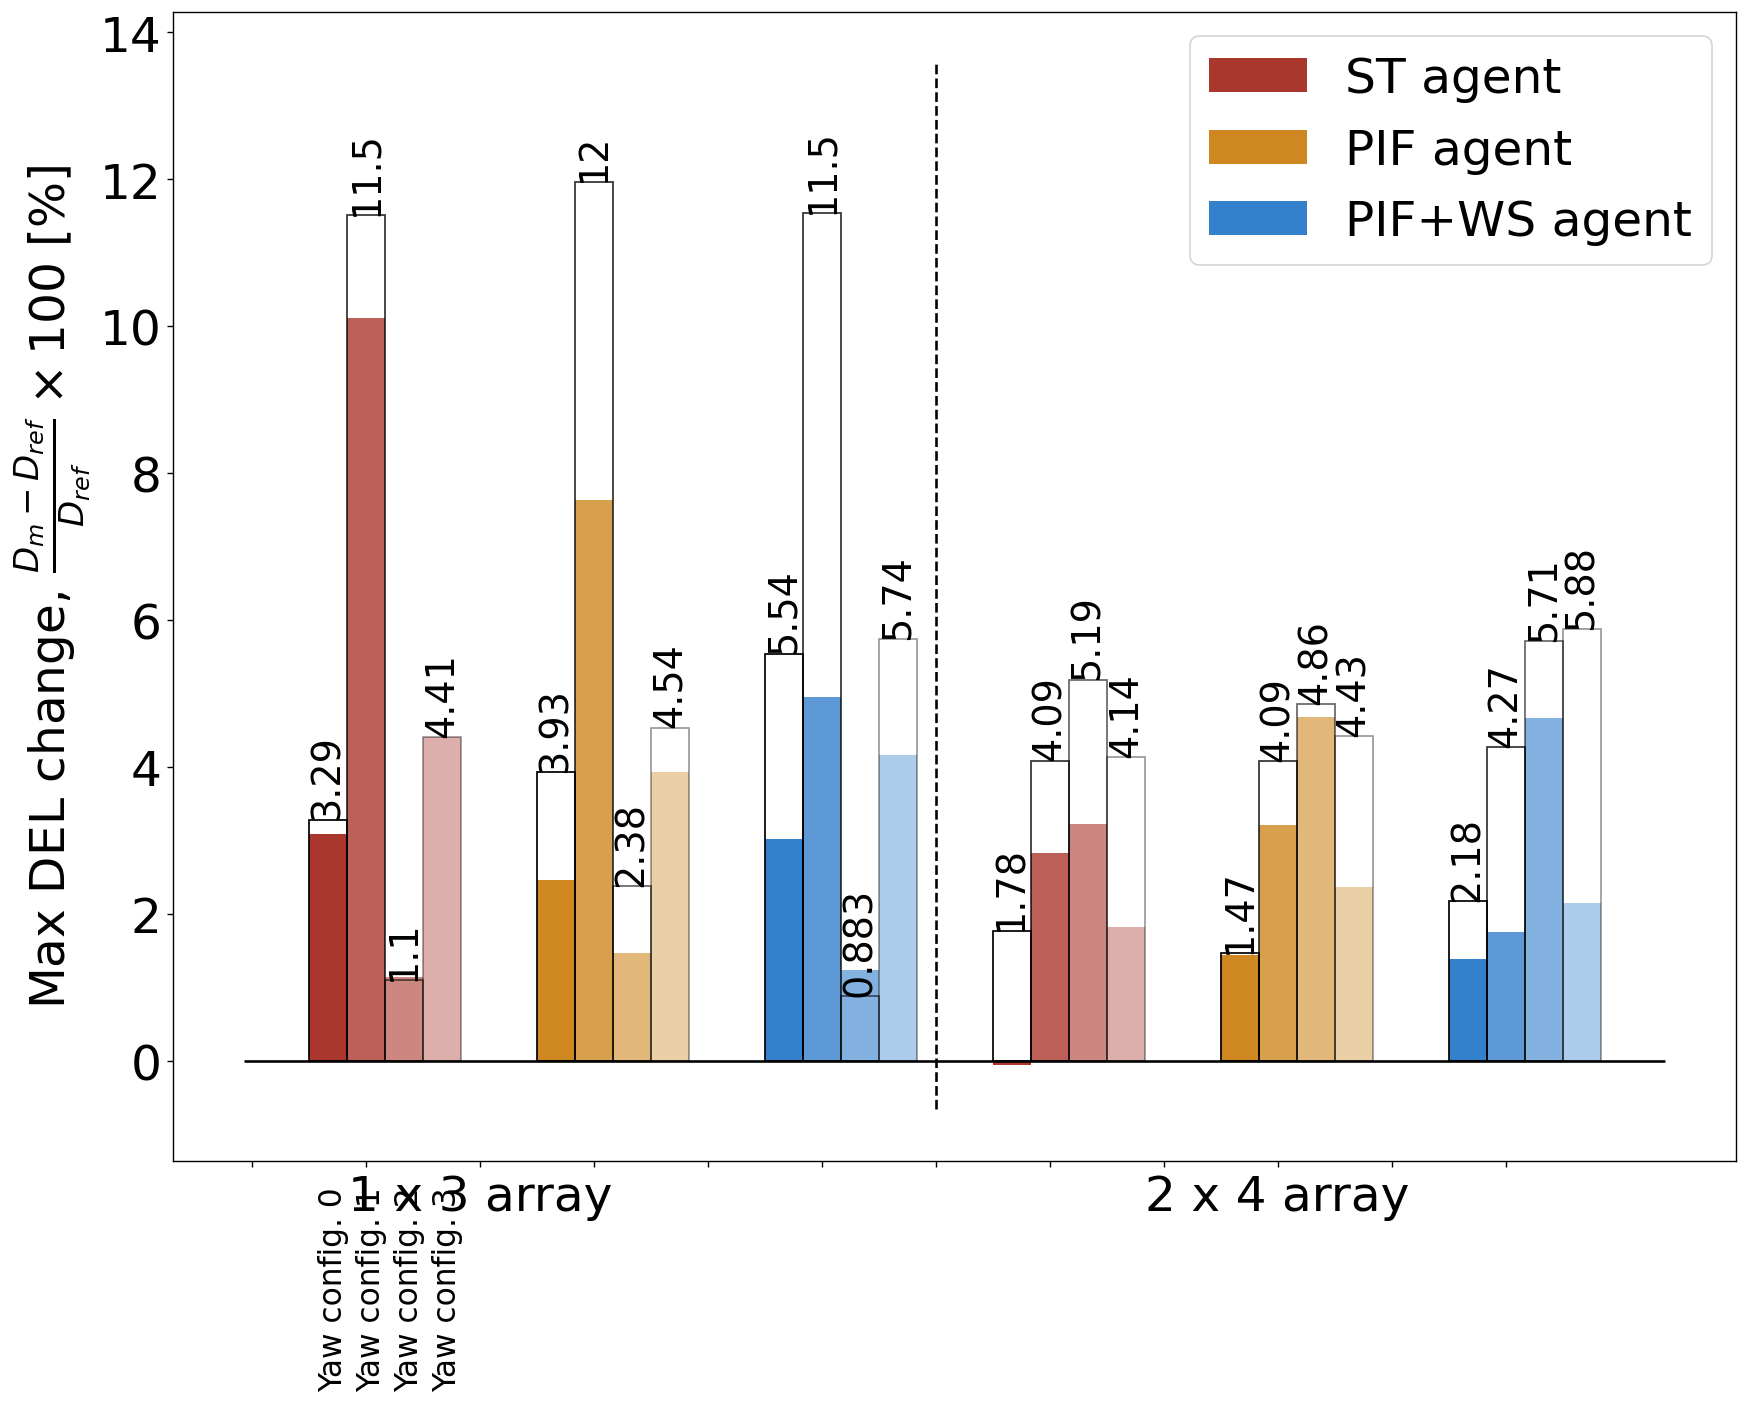

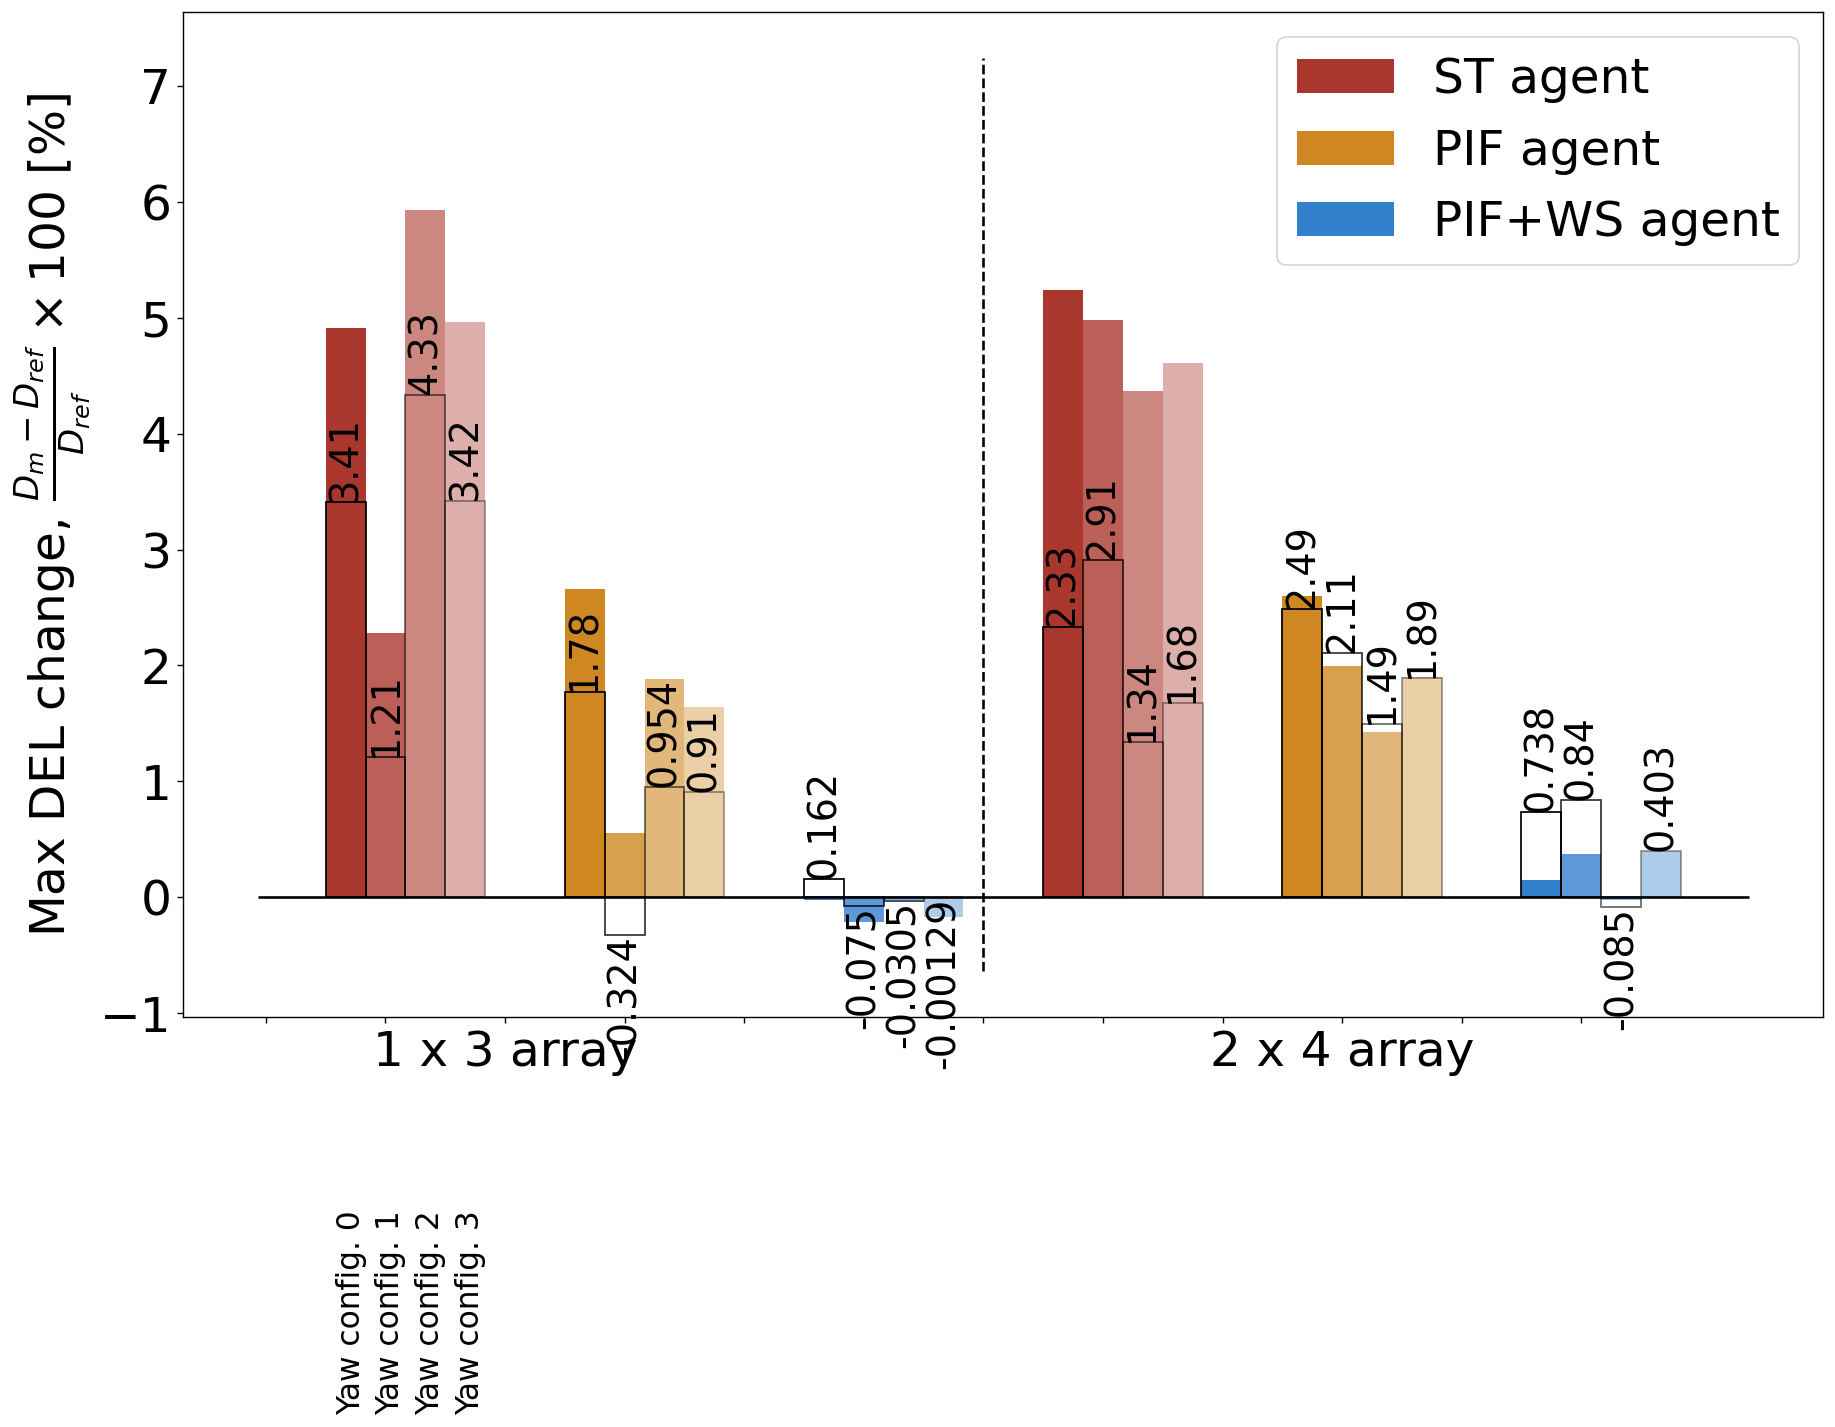

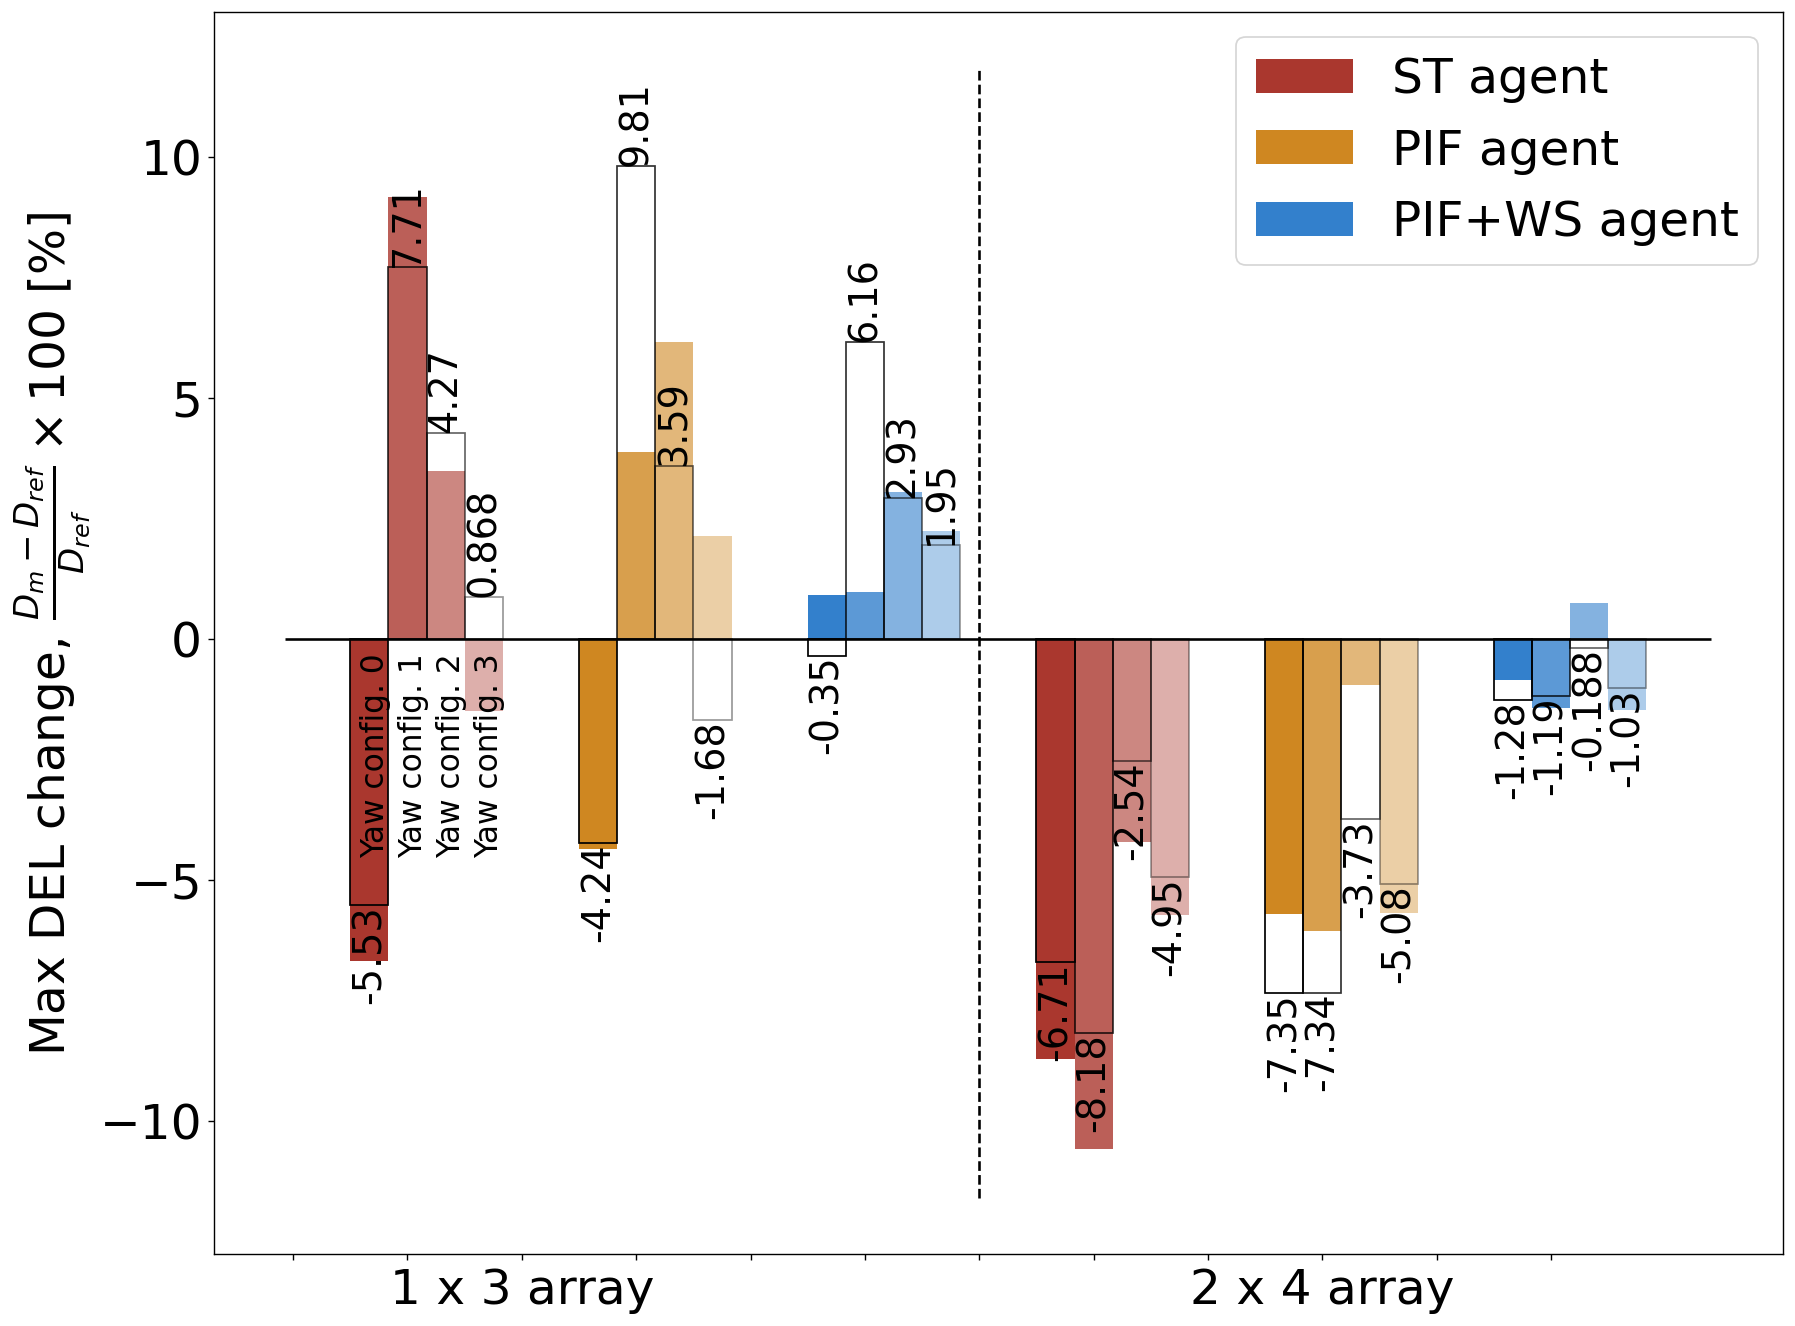

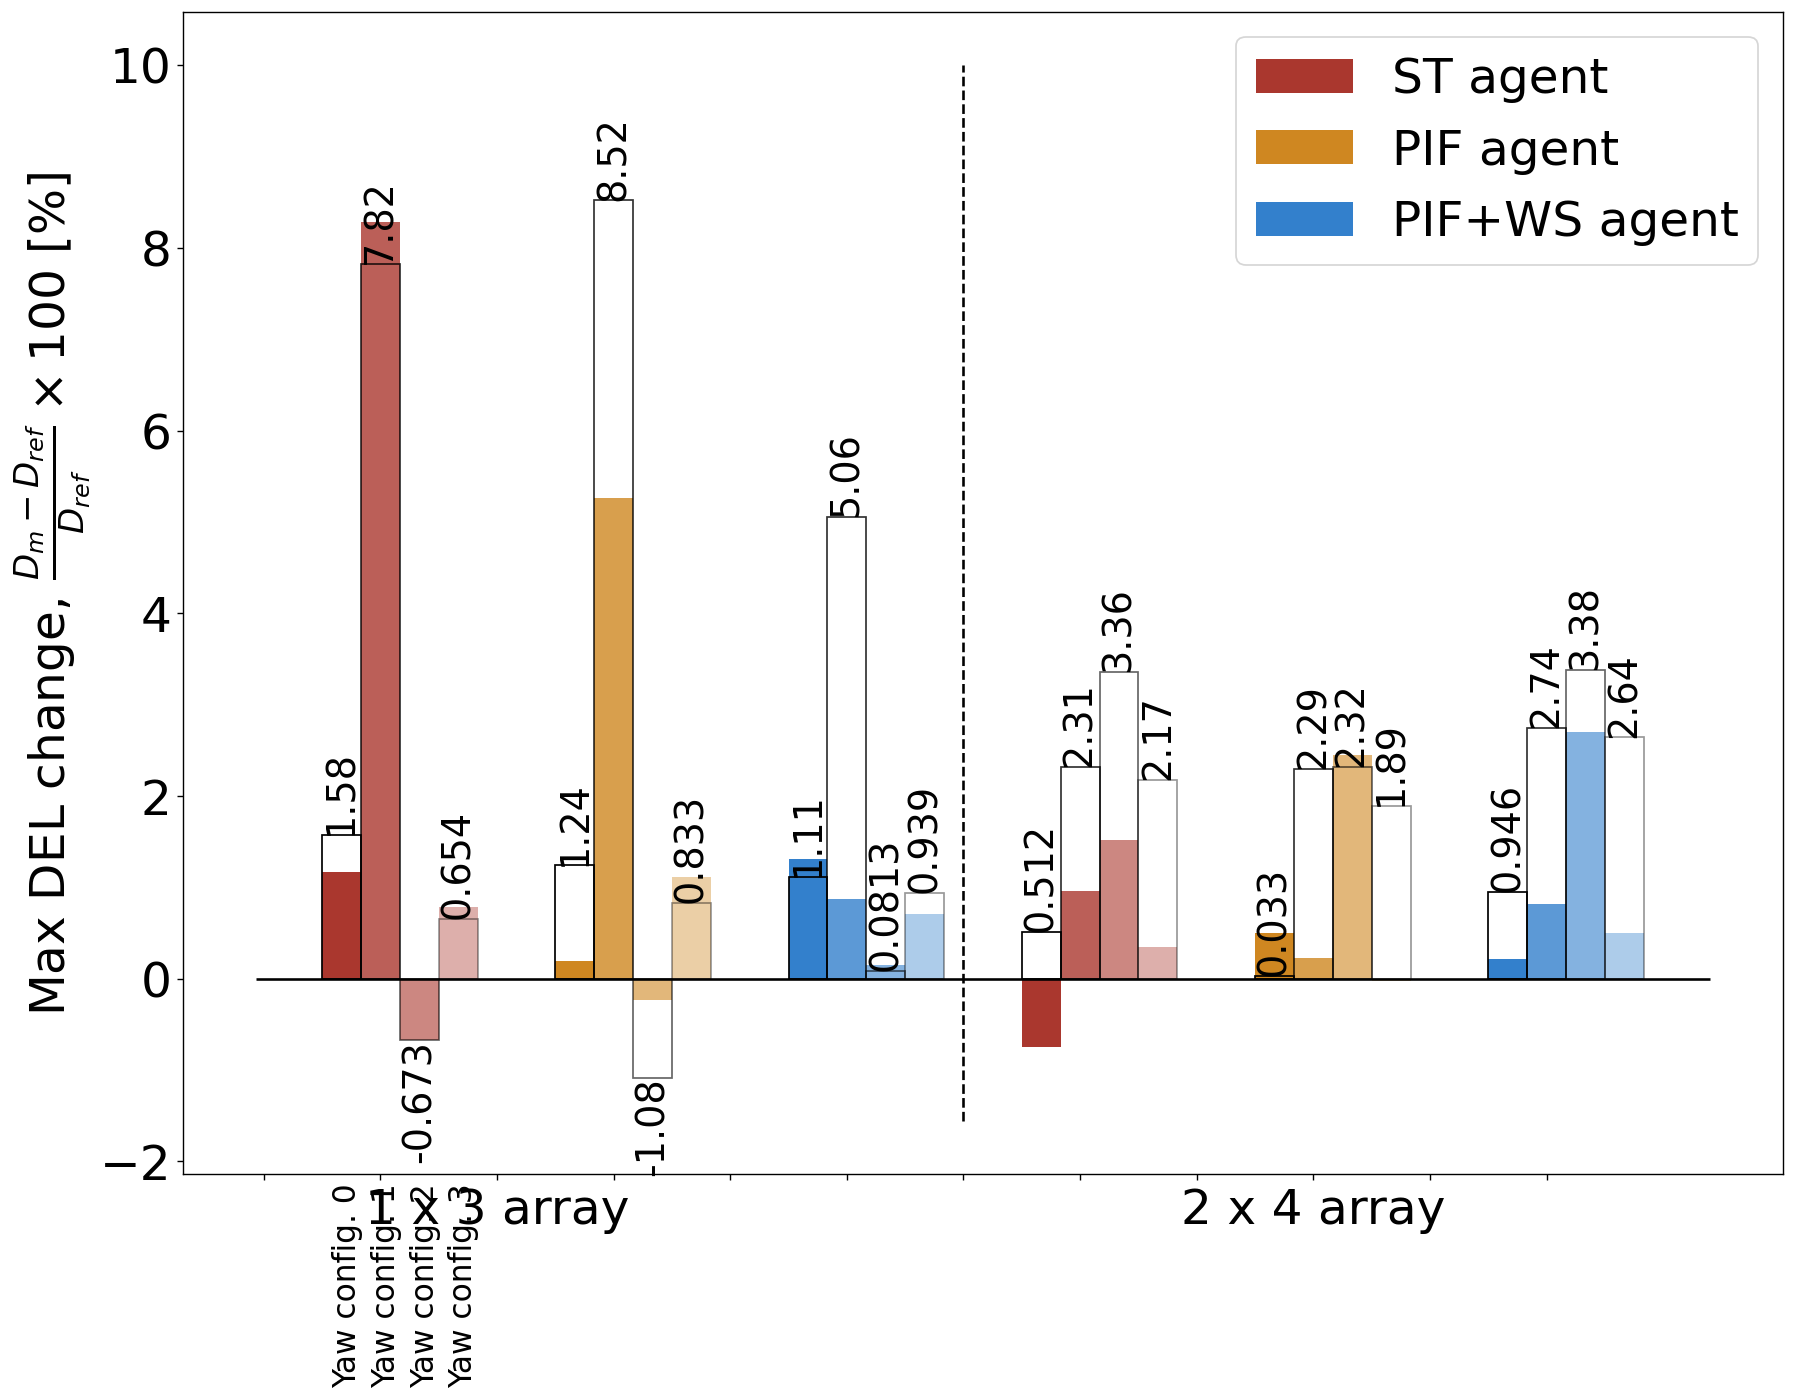

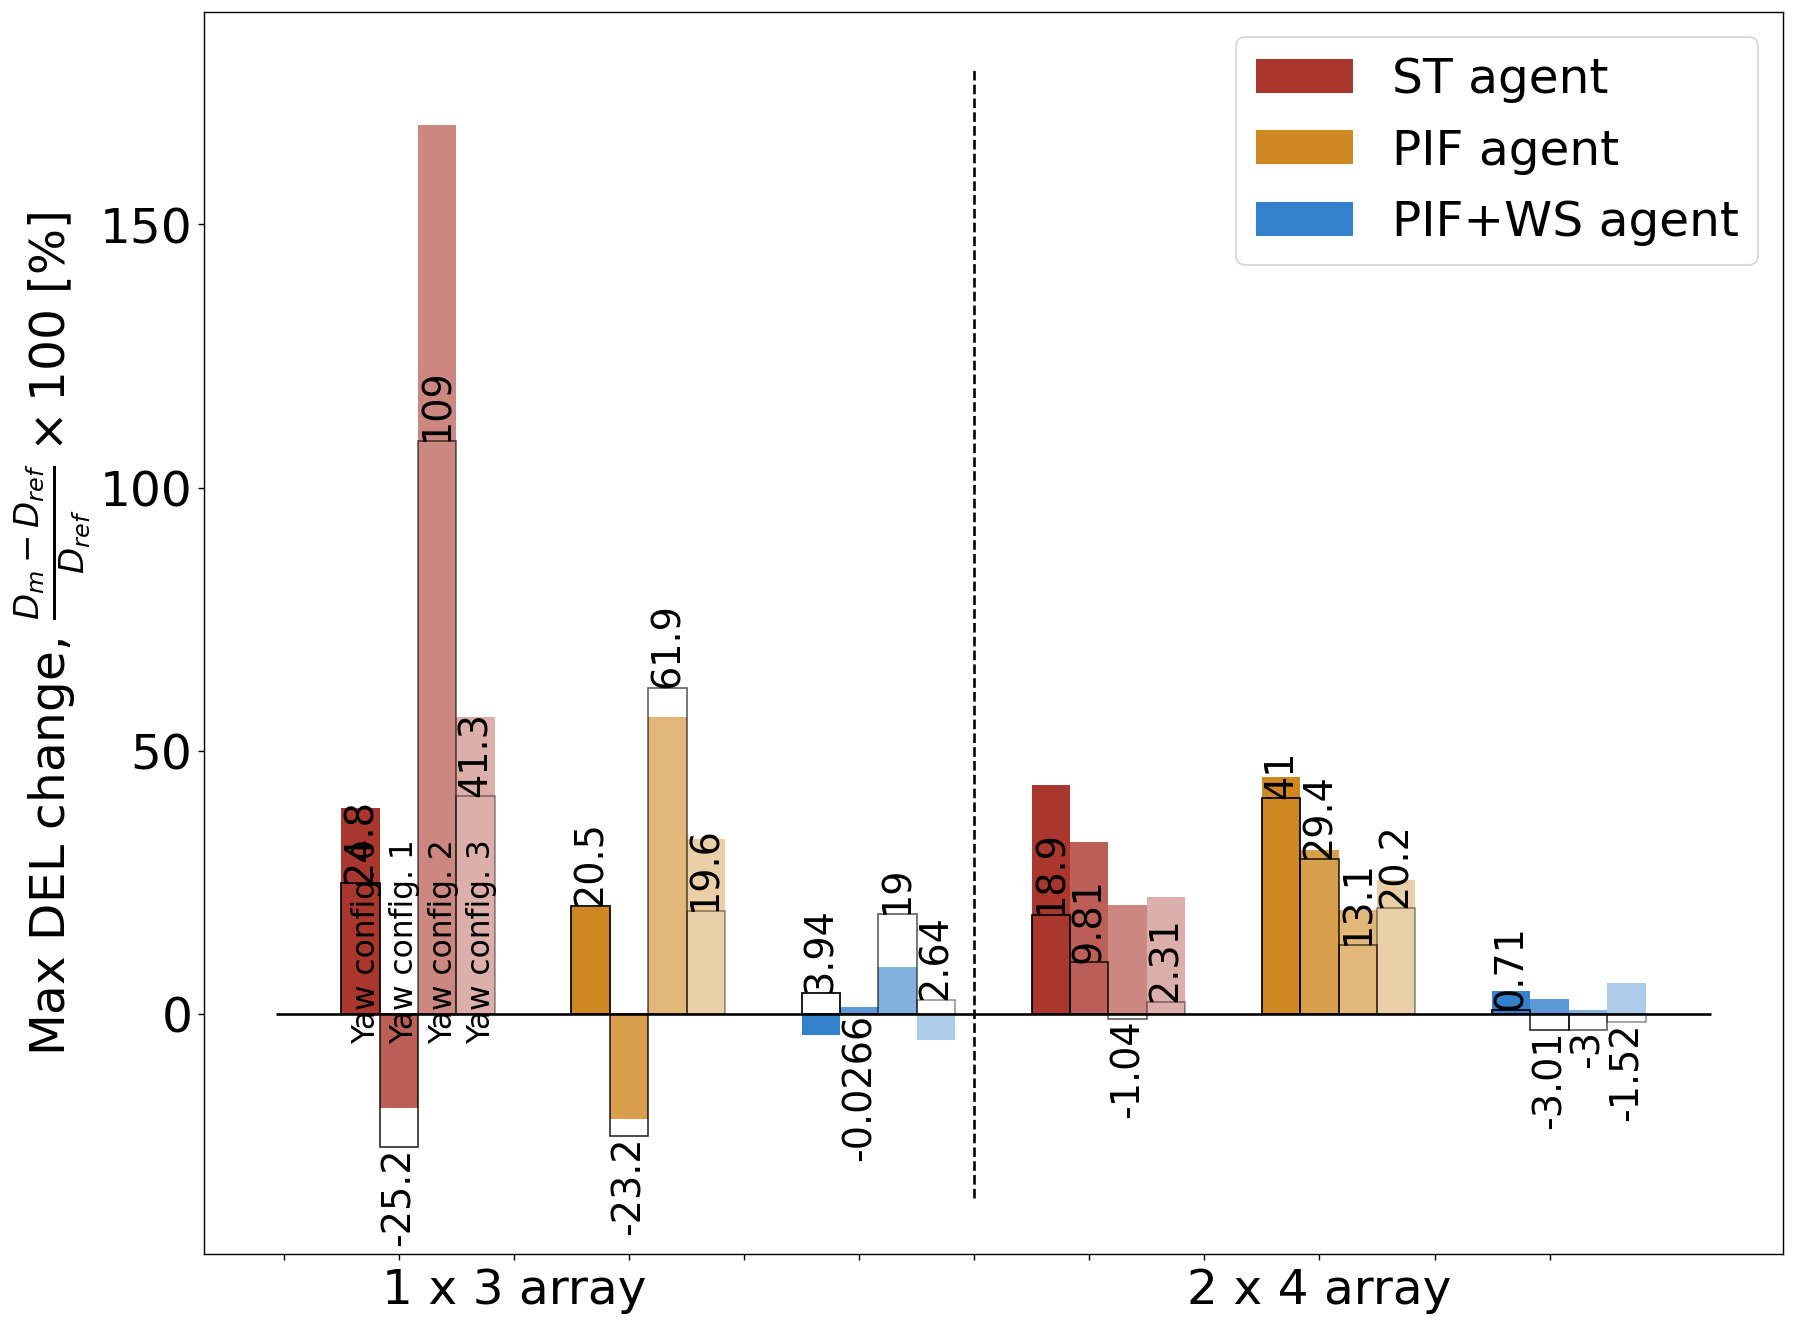

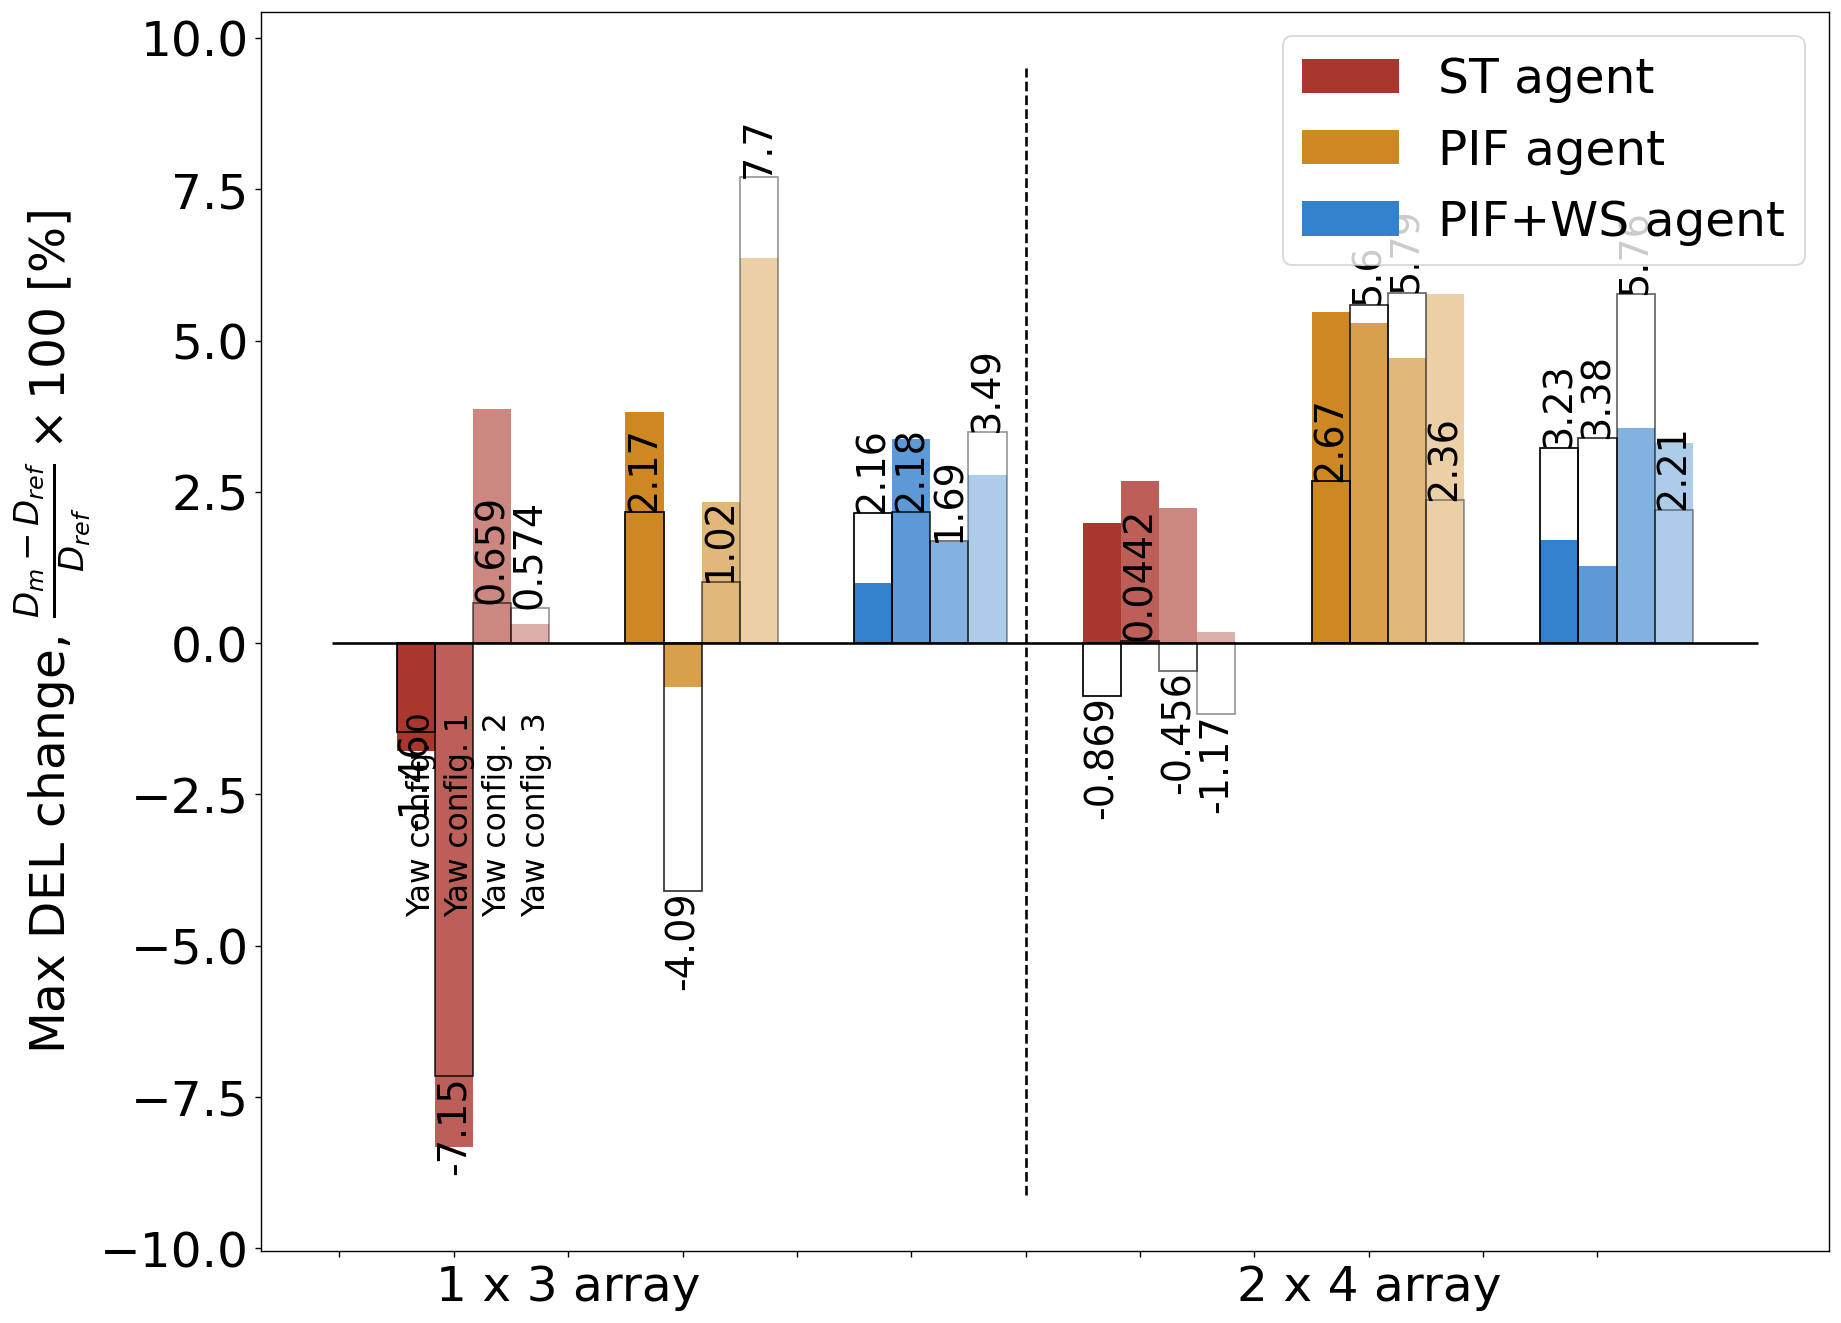

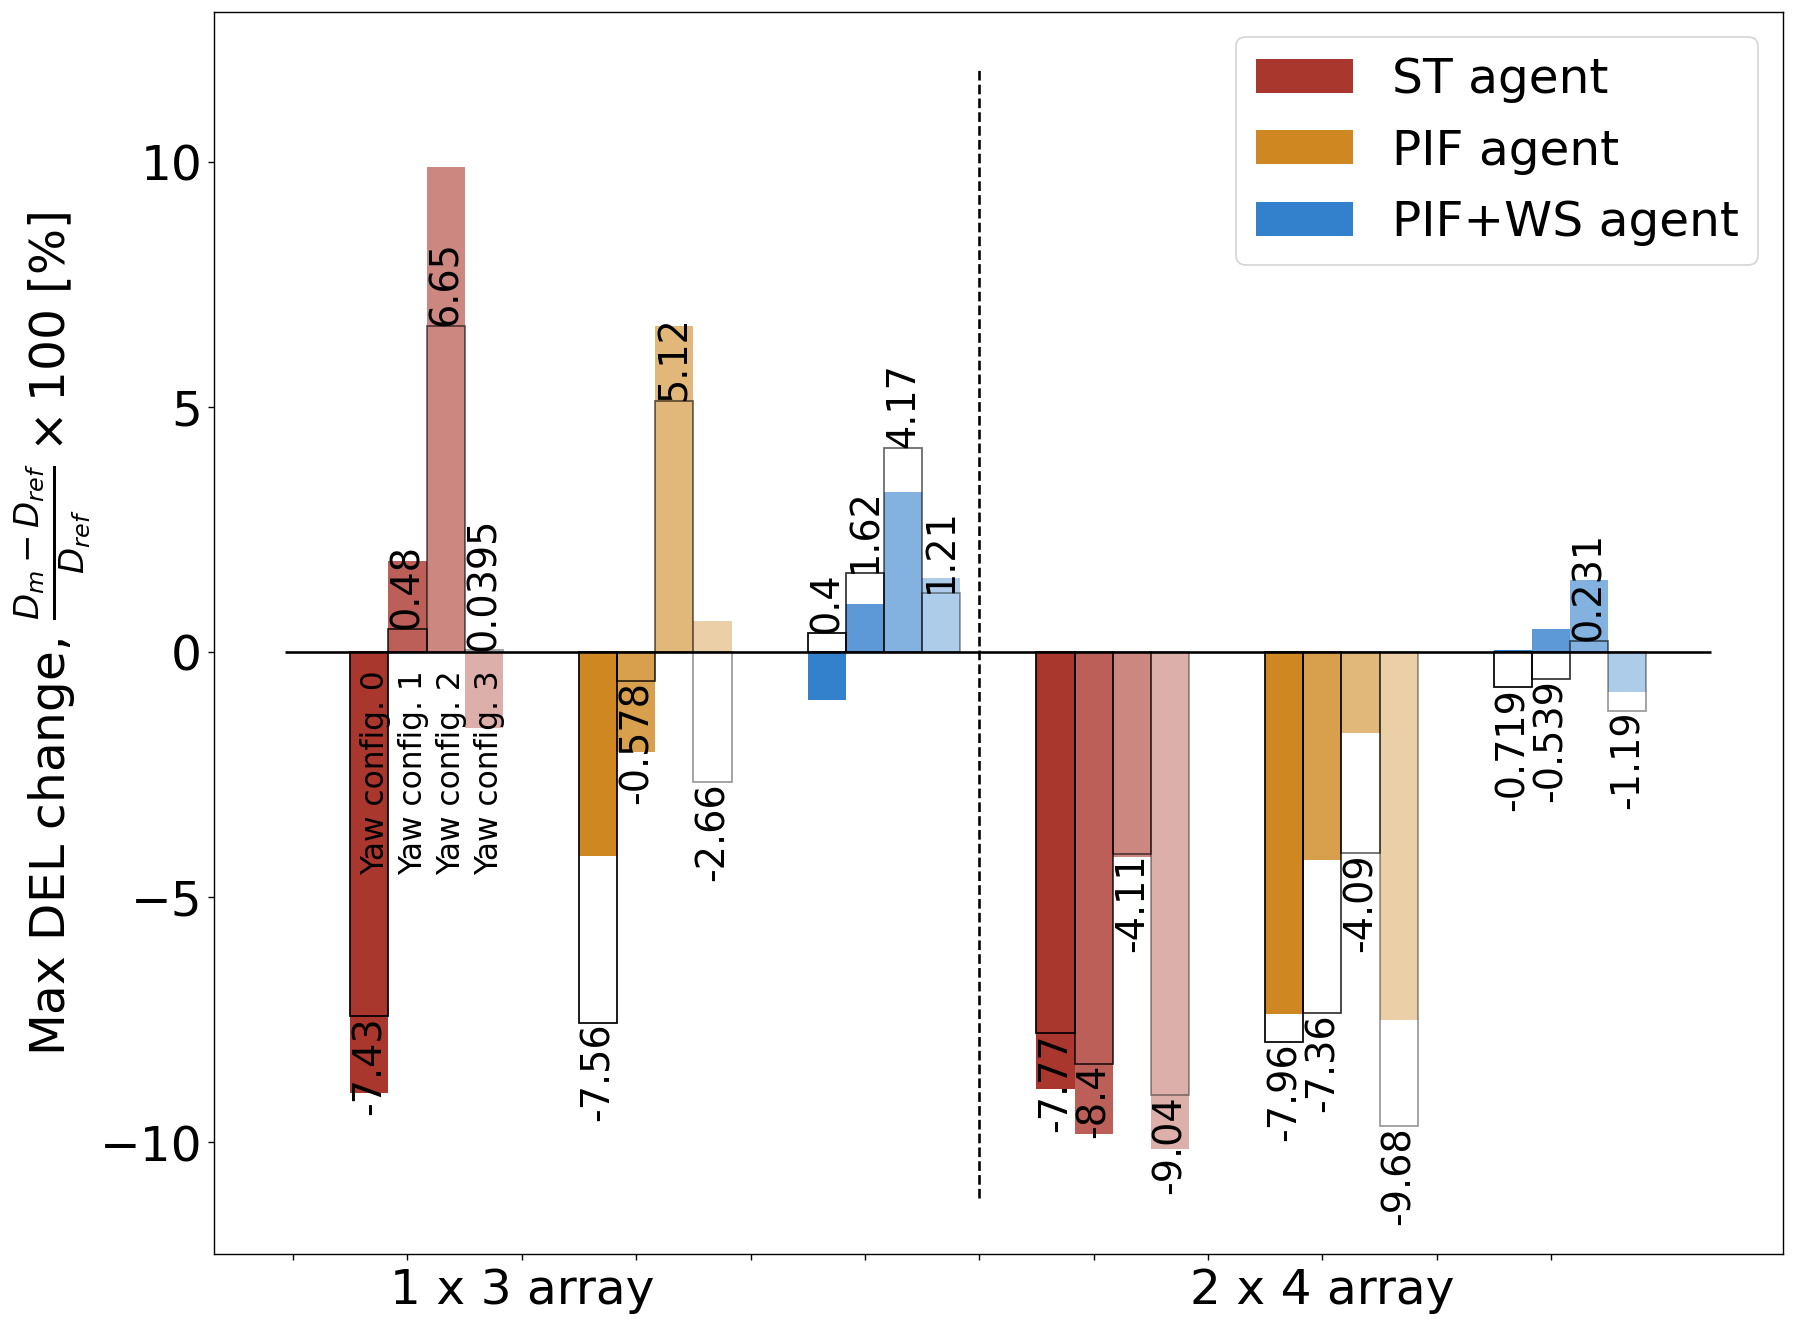

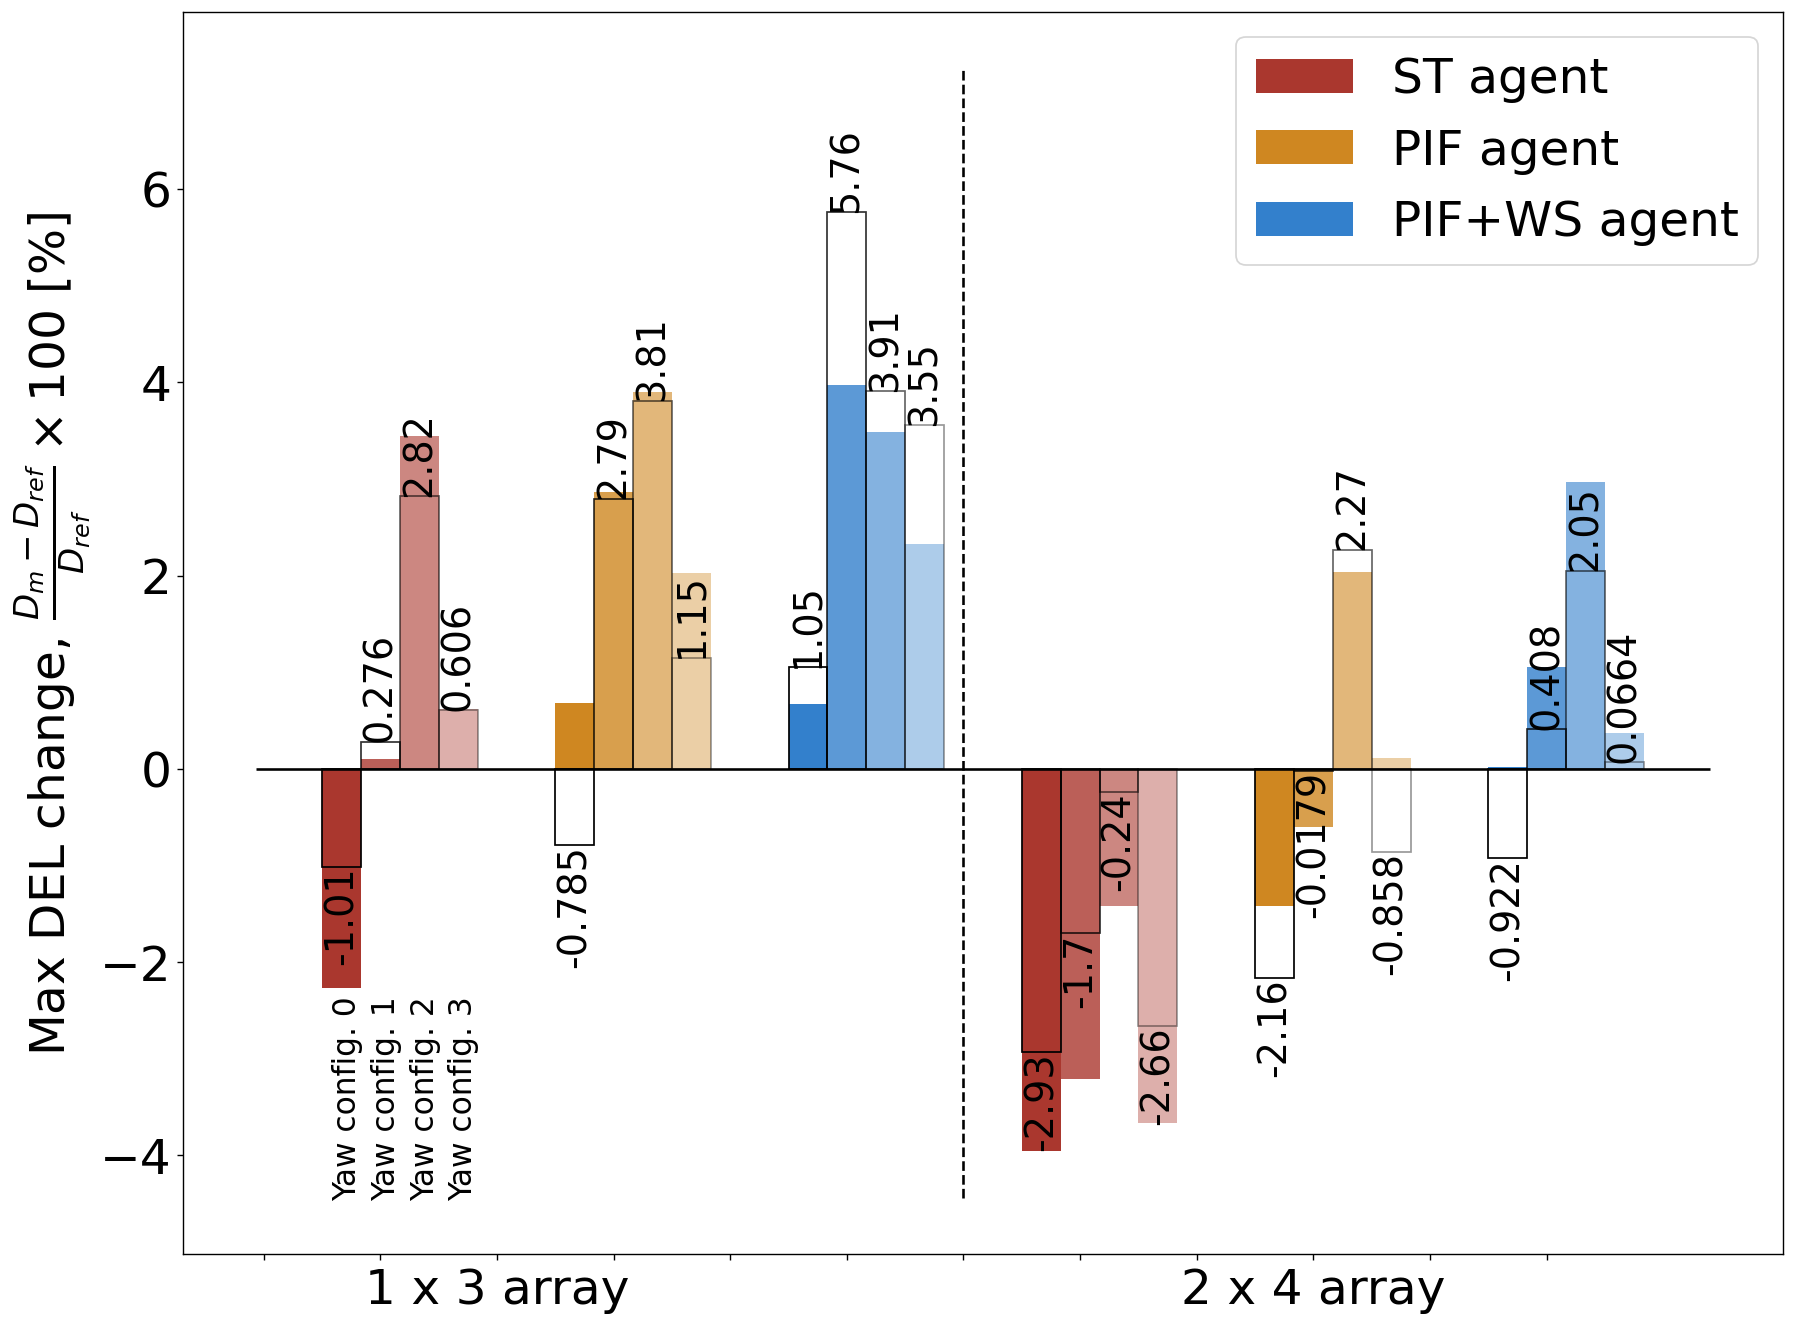

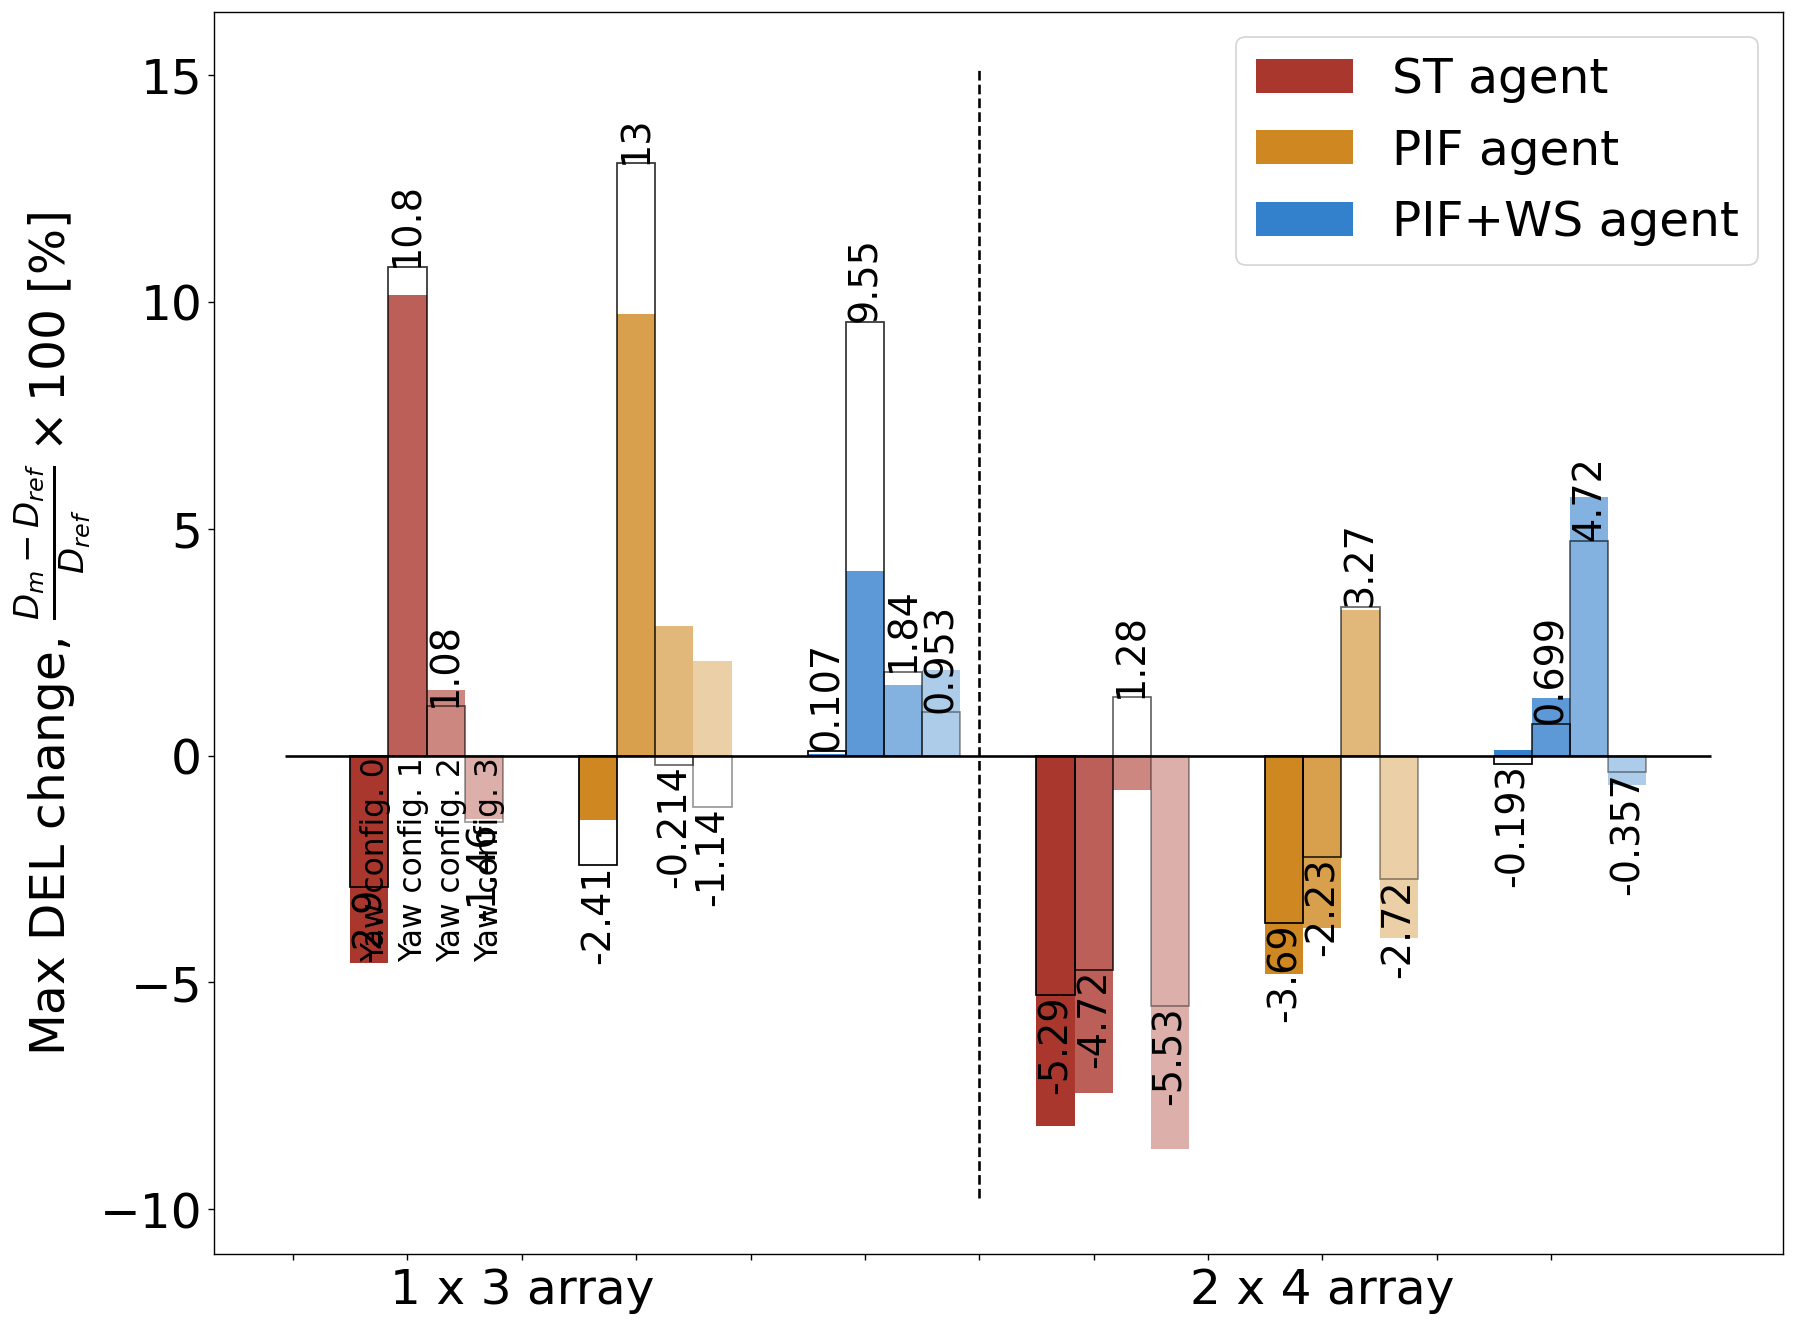

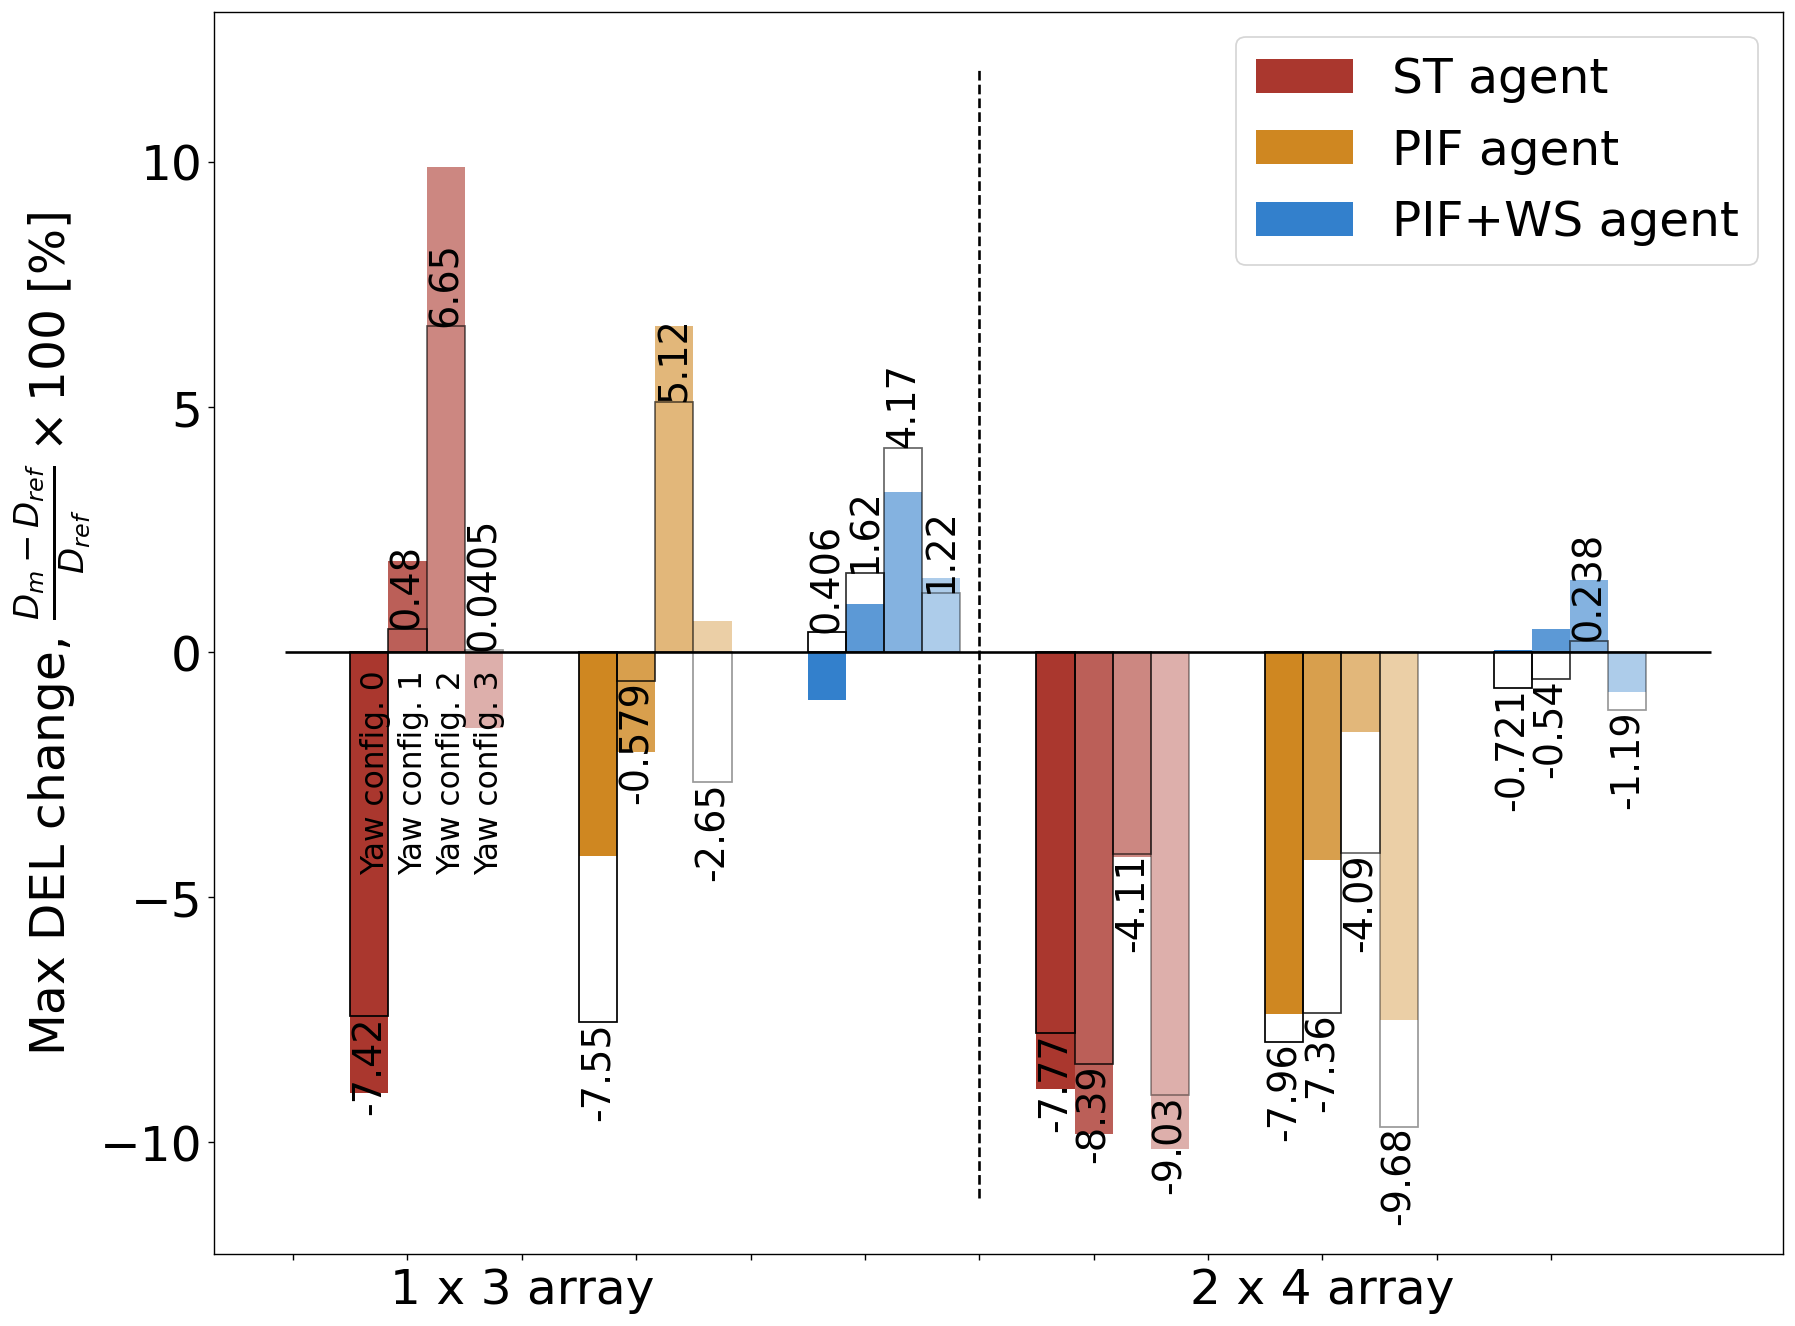

In [13]:
# plot dels
for _,DEL_list_names_indiv in enumerate(DEL_list_names):
    fig, ax=plt.subplots(figsize=(10,6),dpi=125)
    num_categories = len(caselist)
    bar_width = 0.2
    bar_major_spacing = bar_width*3

    ## plot realistic P_ref cases
    bar_position_current = 0
    for casei,case in enumerate(caselist):

        # load data
        with open(case['rundir']+case['datafile'], 'rb') as file:
            caselist_seeds = pickle.load(file)
            
        # loop over groups of three seeds
        more_seeds = True
        seed_index = 0
        seed_step = 3
        y_to_plot_accumulate = []
        while more_seeds:
            keepEvery = 1 # TODO: load this from pickle
            window_filtered = 100 # window for running mean of "filtered" version # TODO: load this from pickle
            # avg_length_start = 100 # num of episodes to average start of run to get initial value # TODO: load this from pickle
            # avg_length_end = 300 # num of episodes to average end of run to get final value # TODO: load this from pickle

            if len(caselist_seeds)>=seed_index+seed_step:
                mean_time = np.mean([case['data']['t'][::keepEvery] for case in caselist_seeds[seed_index:seed_index+seed_step]],axis=0)
                mean_values = np.mean([case['data'][DEL_list_names_indiv+'_movingavg'][::keepEvery] for case in caselist_seeds[seed_index:seed_index+seed_step]],axis=0)
                mean_values_filtered = simple_rolling_average(mean_values,window_filtered)
                # _,y_to_plot,_ = get_relative_value(mean_values_filtered,avg_length_start,avg_length_end)
                y_to_plot = np.nanmax(mean_values_filtered)
                y_to_plot_accumulate.append(y_to_plot)
                seed_index += seed_step
            else:
                more_seeds = False

        # Plot the bars
        r = [None] * len(y_to_plot_accumulate)
        for i in range(len(y_to_plot_accumulate)):
            r[i] = bar_position_current + bar_width*i
            if len(y_to_plot_accumulate)!=1:
                index = i + 1
                alpha = 1-index*0.2
                bars = ax.bar(r[i], y_to_plot_accumulate[i], color=case['color'], alpha=alpha, width=bar_width)
                if casei<2:
                    # ax.text(r[i]-bar_width/4,0.05,'Yaw config. '+str(i+1),rotation=90,fontsize=18)
                    ax.text(r[i]-bar_width/4,-4.4,'Yaw config. '+str(i+1),rotation=90,fontsize=18)
            else:
                index = i
                alpha = 1-index*0.2
                if casei<len(caselist)/2:
                    bars = ax.bar(r[i]+bar_width*2, y_to_plot_accumulate[i], color=case['color'], alpha=alpha, width=bar_width, label=case['label'])
                else:
                    bars = ax.bar(r[i]+bar_width*2, y_to_plot_accumulate[i], color=case['color'], alpha=alpha, width=bar_width)
                if casei<2:
                    # ax.text(r[i]+bar_width*2-bar_width/4,0.05,'Yaw config. '+str(i),rotation=90,fontsize=18)
                    ax.text(r[i]+bar_width*2-bar_width/4,-4.4,'Yaw config. '+str(i),rotation=90,fontsize=18)
            # ax.bar_label(bars,fmt="{:.3g}",padding=0,fontsize=22,rotation=90)
        bar_position_current += bar_major_spacing

    ## plot idealized P_ref cases
    bar_position_current = 0
    for casei,case in enumerate(caselist):

        # load data
        rundir_new = case['rundir'].replace(directory,directory_1seed)
        with open(rundir_new+case['datafile'], 'rb') as file:
            caselist_seeds = pickle.load(file)
            
        # loop over groups of three seeds
        more_seeds = True
        seed_index = 0
        seed_step = 3
        y_to_plot_accumulate = []
        while more_seeds:
            keepEvery = 1 # TODO: load this from pickle
            window_filtered = 100 # window for running mean of "filtered" version # TODO: load this from pickle
            # avg_length_start = 100 # num of episodes to average start of run to get initial value # TODO: load this from pickle
            # avg_length_end = 300 # num of episodes to average end of run to get final value # TODO: load this from pickle

            if len(caselist_seeds)>=seed_index+seed_step:
                mean_time = np.mean([case['data']['t'][::keepEvery] for case in caselist_seeds[seed_index:seed_index+seed_step]],axis=0)
                mean_values = np.mean([case['data'][DEL_list_names_indiv+'_movingavg'][::keepEvery] for case in caselist_seeds[seed_index:seed_index+seed_step]],axis=0)
                mean_values_filtered = simple_rolling_average(mean_values,window_filtered)
                # _,y_to_plot,_ = get_relative_value(mean_values_filtered,avg_length_start,avg_length_end)
                y_to_plot = np.nanmax(mean_values_filtered)
                y_to_plot_accumulate.append(y_to_plot)
                seed_index += seed_step
            else:
                more_seeds = False

        # Plot the bars
        r = [None] * len(y_to_plot_accumulate)
        for i in range(len(y_to_plot_accumulate)):
            r[i] = bar_position_current + bar_width*i
            if len(y_to_plot_accumulate)!=1:
                index = i + 1
                alpha = 1-index*0.2
                bars = ax.bar(r[i], y_to_plot_accumulate[i], facecolor='none', edgecolor='k', linewidth=1,  alpha=alpha, width=bar_width)
                # if casei<2:
                    # ax.text(r[i]-bar_width/4,0.05,'Yaw config. '+str(i+1),rotation=90,fontsize=18)
            else:
                index = i
                alpha = 1-index*0.2
                if casei<len(caselist)/2:
                    bars = ax.bar(r[i]+bar_width*2, y_to_plot_accumulate[i], facecolor='none', edgecolor='k', linewidth=1, alpha=alpha, width=bar_width) #, label=case['label'])
                else:
                    bars = ax.bar(r[i]+bar_width*2, y_to_plot_accumulate[i], facecolor='none', edgecolor='k', linewidth=1, alpha=alpha, width=bar_width)
                # if casei<2:
                #     ax.text(r[i]+bar_width*2-bar_width/4,0.05,'Yaw config. '+str(i),rotation=90,fontsize=18)
            ax.bar_label(bars,fmt="{:.3g}",padding=0,fontsize=22,rotation=90)
        bar_position_current += bar_major_spacing

    # Add grid lines
    ax.vlines(x=bar_major_spacing*len(caselist)/2,ymin=ax.get_ylim()[0],ymax=ax.get_ylim()[1]+1,linestyle='--', color = 'k')
    ax.hlines(y=0,xmin=ax.get_xlim()[0],xmax=ax.get_xlim()[1],linestyle='-', color = 'k')

    # Add labels and title
    # ax.set_ylabel(r'% Change vs FLORIS optimal')
    plt.ylabel(r'Max DEL change, $\frac{D_m-D_{ref}}{D_{ref}} \times 100$ [$\%$]')
    # ax.set_xlabel('Categories', fontweight='bold')
    # ax.set_xticks([r*bar_major_spacing for r in range(num_categories)])
    # ax.set_xticklabels([case['label'] for case in caselist], rotation=45)  # Rotate labels
    ax.set_xticks([bar_major_spacing*x for x in np.arange(len(caselist))])
    ax.set_xticklabels(['','','1 x 3 array','','','','','','','2 x 4 array','',''])  # Rotate labels
    # ax.set_ylim([-3,14])
    # ax.set_title('Grouped Bar Plot Example')
    ax.legend(loc='upper right')
    plt.subplots_adjust(bottom=0.35)  # Increase bottom margin
    plt.gcf().set_size_inches(15, 11.25)
    plt.tight_layout()
    fig.savefig(os.path.join('combination_combined_max_del_'+DEL_list_names_indiv+'.svg'), format='svg', dpi=100)